<a href="https://colab.research.google.com/github/aditsijoshi/SureStart2021/blob/main/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #for linear alg
import pandas as pd # data processing for the aray formatting
import seaborn as sns 
import matplotlib.pyplot as plt # for plotting accuracy 
import warnings
warnings.filterwarnings('ignore')


In [4]:
import os
print (os.listdir("/content"))

#read train dataset
train = pd.read_csv("/content/train.csv")
train.head()

['.config', 'test.csv', 'train.csv', 'sample_data']


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# put labels in y_train
Y_train = train["label"]

#put lables into x_tain by dropping label col
X_train = train.drop(labels = ["label"],axis = 1) 

print(X_train)


       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0         0
41998       0       0       0       0  ...         0         0         0         0
41999       0       0       0       0  ...         0         0         0         0

[42

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

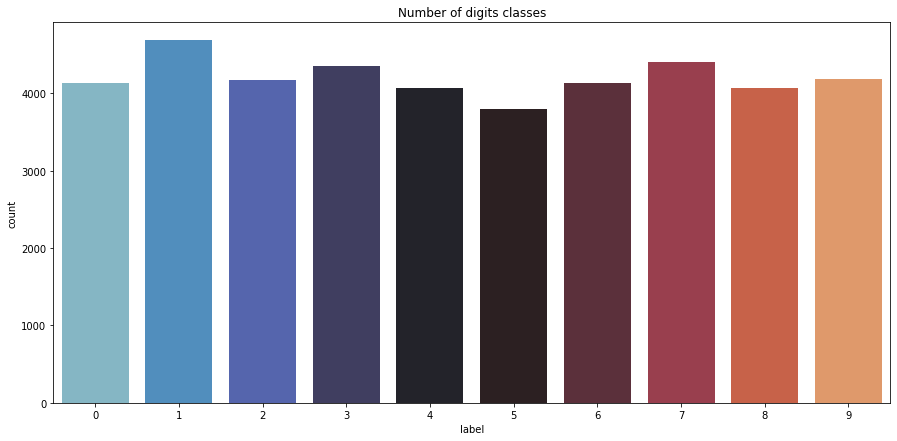

In [9]:
#visualize number of digit classes
plt.figure(figsize=(15,7))
g=sns.countplot(Y_train, palette="icefire")
plt.title("Number of digits classes")
Y_train.value_counts()

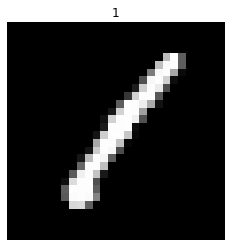

In [11]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

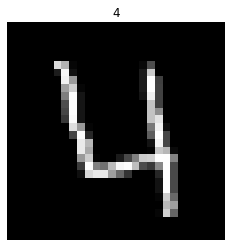

In [13]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [14]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

NameError: ignored

In [15]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)


NameError: ignored

In [19]:
# Label Encoding - what is one hot encoding?
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [20]:
# how is this different from validation and the seperate testing dataset we have?
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (34020, 28, 28, 1)
x_test shape (3780, 28, 28, 1)
y_train shape (34020, 10)
y_test shape (3780, 10)


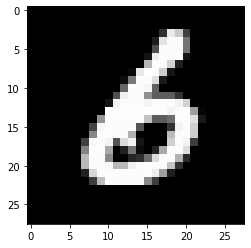

In [21]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

Confusion Matrix Begins:

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [23]:
# Define the optimizer- search adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [24]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

In [25]:
epochs = 10  # for better result increase the epochs
batch_size = 250

To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
Alter the training data with small transformations to reproduce the variations of digit.

In [26]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [27]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
136/136 [==============================] - 27s 190ms/step - loss: 1.5697 - accuracy: 0.4513 - val_loss: 0.2335 - val_accuracy: 0.9407
Epoch 2/10
136/136 [==============================] - 26s 188ms/step - loss: 0.5255 - accuracy: 0.8297 - val_loss: 0.1453 - val_accuracy: 0.9569
Epoch 3/10
136/136 [==============================] - 25s 187ms/step - loss: 0.3668 - accuracy: 0.8828 - val_loss: 0.1150 - val_accuracy: 0.9675
Epoch 4/10
136/136 [==============================] - 26s 191ms/step - loss: 0.2964 - accuracy: 0.9062 - val_loss: 0.0981 - val_accuracy: 0.9706
Epoch 5/10
136/136 [==============================] - 26s 188ms/step - loss: 0.2615 - accuracy: 0.9156 - val_loss: 0.0838 - val_accuracy: 0.9743
Epoch 6/10
136/136 [==============================] - 26s 189ms/step - loss: 0.2283 - accuracy: 0.9285 - val_loss: 0.0818 - val_accuracy: 0.9770
Epoch 7/10
136/136 [==============================] - 26s 188ms/step - loss: 0.2088 - accuracy: 0.9364 - val_loss: 0.0704 - val_ac

In [18]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: ignored

In [17]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

NameError: ignored